In [1]:
# コーパス取得元：からダウンロード
# http://mattmahoney.net/dc/text8.zip

!wget http://mattmahoney.net/dc/text8.zip
!ls -ltr

--2019-06-15 00:21:42--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.75
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.75|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip’

text8.zip           100%[===================>]  29.89M  2.10MB/s    in 14s     

2019-06-15 00:22:02 (2.07 MB/s) - ‘text8.zip’ saved [31344016/31344016]

total 30616
-rw-r--r-- 1 root root 31344016 Jul 23  2009 text8.zip
drwxr-xr-x 1 root root     4096 May 31 16:17 sample_data


In [2]:
# 解凍
! unzip text8.zip
!ls -ltr

Archive:  text8.zip
  inflating: text8                   
total 128276
-rw-r--r-- 1 root root 100000000 Jun  9  2006 text8
-rw-r--r-- 1 root root  31344016 Jul 23  2009 text8.zip
drwxr-xr-x 1 root root      4096 May 31 16:17 sample_data


In [0]:
# ======================================
# 1.インポート
# ======================================
import gensim
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# ======================================
# 2.学習
# ======================================
# 学習に時間を要するので要注意！

# コーパス取得
sentences = gensim.models.word2vec.Text8Corpus("text8")
# 学習
#  workers:スレッド数
#  min_count:この回数よりも出現頻度が低い単語は無視する。
model = gensim.models.word2vec.Word2Vec(sentences, size=200, window=5, workers=4, min_count=5)

model.save("W2vec.model")
!ls -ltr

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


total 244108
-rw-r--r-- 1 root root 100000000 Jun  9  2006 text8
-rw-r--r-- 1 root root  31344016 Jul 23  2009 text8.zip
drwxr-xr-x 1 root root      4096 May 31 16:17 sample_data
-rw-r--r-- 1 root root  57032128 Jun 15 00:24 W2vec.model.wv.vectors.npy
-rw-r--r-- 1 root root  57032128 Jun 15 00:24 W2vec.model.trainables.syn1neg.npy
-rw-r--r-- 1 root root   4544195 Jun 15 00:24 W2vec.model


In [5]:
# ======================================
# 3.学習結果の出力
# ======================================
# horse(馬)のベクトル
#horse_vec = model['horse']
#print(horse_vec)

# horse(馬)との類似の単語を出力する。cos類似度トップ5。
sim_horse = model.most_similar(['horse'],topn=5)
print(sim_horse)


# 'horse' - 'horses' 間のcos類似度
print(model.similarity('horse','horses'))


[('horses', 0.7704652547836304), ('thoroughbred', 0.6834777593612671), ('riding', 0.6686593294143677), ('dog', 0.6517093181610107), ('ride', 0.6476483345031738)]
0.7704653


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


['horses', 'thoroughbred', 'riding', 'dog', 'ride'] 
 [0.7704652547836304, 0.6834777593612671, 0.6686593294143677, 0.6517093181610107, 0.6476483345031738]


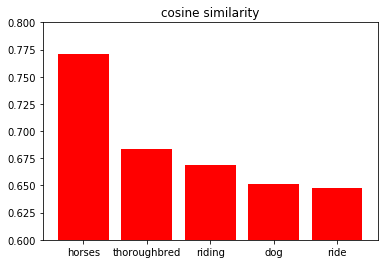

In [6]:
# ======================================
# 4.学習結果の描画
# ======================================
# 単語のリストとコサイン類似度のリストに分ける
word_list = [toupleElem[0] for toupleElem in sim_horse ]
cossim_list = [toupleElem[1] for toupleElem in sim_horse ]
print(word_list, "\n" ,cossim_list)

#########

# トップ5のコサイン類似度をプロットしてみる。(棒グラフ)
plt.title('cosine similarity')

# y軸の範囲0.6～0.8
plt.ylim(0.6, 0.8)

# x軸：単語、y軸:コサイン類似度
plt.bar(word_list, cossim_list , color = "red")

plt.show()